## Тема: Структури даних стек і черга  
Мета: реалізація базових структур даних стек і черга засобами Python та аналіз їх поведінки.

#### Виконала: Лабущак Анжела  
#### Група: КН-24-1  

## 1. Ініціалізація середовища

In [4]:
from collections import deque
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

## 2. Стек на Python

In [7]:
class Stack:
    def __init__(self):
        self.stack = []

    def push(self, item):
        self.stack.append(item)

    def pop(self):
        return self.stack.pop() if self.stack else None

    def is_empty(self):
        return len(self.stack) == 0

    def peek(self):
        return self.stack[-1] if self.stack else None

s = Stack()
s.push(10)
s.push(20)
s.pop()


20

## 3. Черга на Python

In [10]:
class Queue:
    def __init__(self):
        self.queue = deque()

    def enqueue(self, item):
        self.queue.append(item)

    def dequeue(self):
        return self.queue.popleft() if self.queue else None

    def is_empty(self):
        return len(self.queue) == 0

q = Queue()
q.enqueue(5)
q.enqueue(15)
q.dequeue()


5

## 4. Порівняння продуктивності

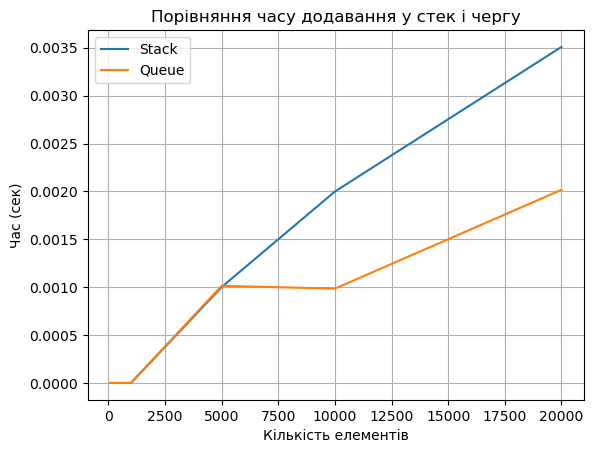

In [13]:
def benchmark_push(stack_class, size):
    s = stack_class()
    start = time.time()
    for i in range(size):
        s.push(i) if hasattr(s, 'push') else s.enqueue(i)
    return time.time() - start

sizes = [100, 1000, 5000, 10000, 20000]
stack_times = [benchmark_push(Stack, size) for size in sizes]
queue_times = [benchmark_push(Queue, size) for size in sizes]

plt.plot(sizes, stack_times, label='Stack')
plt.plot(sizes, queue_times, label='Queue')
plt.xlabel("Кількість елементів")
plt.ylabel("Час (сек)")
plt.title("Порівняння часу додавання у стек і чергу")
plt.legend()
plt.grid(True)
plt.show()


## 5. Висновки
Стек і черга мають схожі часові характеристики при базових операціях, однак черга (на базі deque) часто працює швидше на великих об'ємах.

## 6. Відповіді на контрольні питання
Стек (stack) — структура типу LIFO (останній прийшов — перший вийшов).

Черга (queue) — структура типу FIFO (перший прийшов — перший вийшов).

Python реалізує стек через list, чергу — через collections.deque.

Переваги deque: ефективні вставки/видалення з обох кінців, стабільна продуктивність.

Стек застосовується у зворотній обробці, рекурсії. Черга — в обробці подій, плануванні задач.

Час доступу до останнього елемента в стеку — O(1); в черзі до початкового — теж O(1).
